# Market Guide
Published and maintained by [Hanerest LLC](http://hanerest.com).

Project: https://github.com/Hanerest/market-guide

In [6]:
# Initialization

%matplotlib inline

import datetime

import numpy as np
import pandas as pd
import pandas.io.data
import pandas.io.wb
from pandas import Series, DataFrame

import matplotlib.pyplot as plt, mpld3 # Require mpld3 library
import matplotlib as mpl

import Quandl
from yahoo_finance import Share

### SETTINGS ###

# Size for the charts
plt.rcParams['figure.figsize'] = 9, 6

# If your query exceeds the limits, you can get a free API key from Quandl.com
QUANDLKEY = "" 

# Turn on the interactive charting for this notebook
mpld3.enable_notebook()

## Equities

### S&P500 Index at Inflection Points

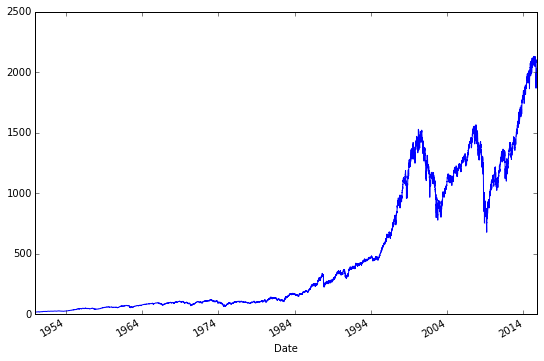

In [7]:
# S&P500 Index at Inflection Points

SP500 = pd.io.data.get_data_yahoo("^GSPC", 
                               start=datetime.datetime(1900, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

SP500.plot()

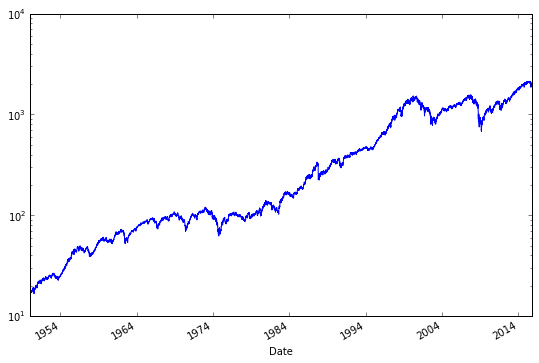

In [8]:
# S&P500 Index at Inflection Points in Log Scale
SP500.plot(logy=True)

### S&P 500 Index: Forward P/E ratio

In [9]:
SP500PE = Quandl.get("MULTPL/SP500_PE_RATIO_MONTH", trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")

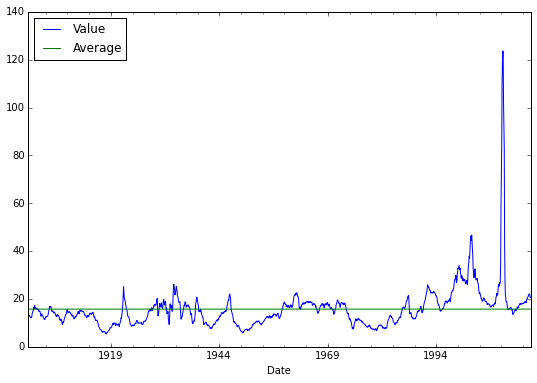

In [10]:
SP500PE["Average"]=SP500PE["Value"].mean()
SP500PE.plot()

### P/E and Monthly Returns

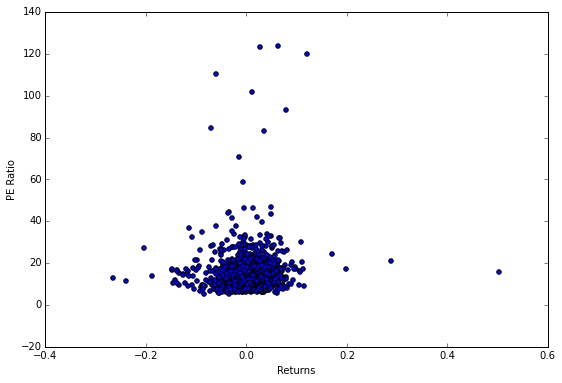

In [11]:
SP500PER = Quandl.get(["MULTPL/SP500_REAL_PRICE_MONTH","MULTPL/SP500_PE_RATIO_MONTH"], trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")
plt.scatter(SP500PER["MULTPL.SP500_REAL_PRICE_MONTH - Value"].pct_change(), SP500PER["MULTPL.SP500_PE_RATIO_MONTH - Value"])
plt.xlabel('Returns')
plt.ylabel('PE Ratio')

### Corporate Financials

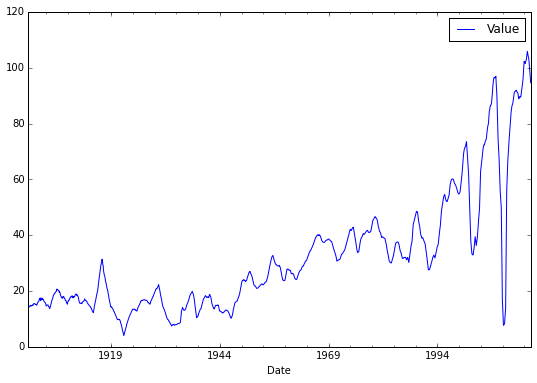

In [12]:
# S&P500 Earning Per Share
SP500EPS = Quandl.get("MULTPL/SP500_EARNINGS_MONTH", trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")
SP500EPS.plot()

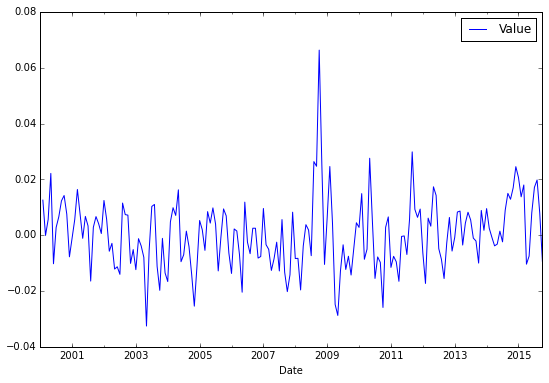

In [13]:
# Dollar Index YoY Change
# Change to "FED/JRXWTFB_N_A" for annual data
DollarIndex = Quandl.get("FED/JRXWTFB_N_M", trim_start="2000-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas").pct_change()
DollarIndex.plot()

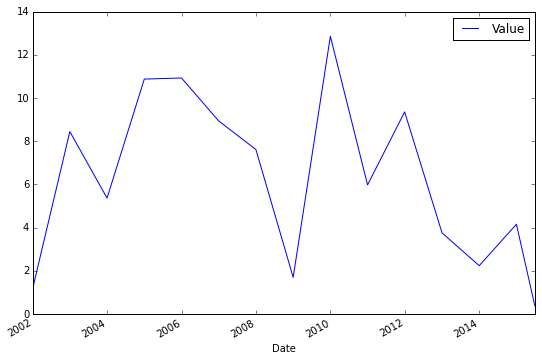

In [14]:
# S&P 500 Sales Growth Rate by Year
SP500SALESG = Quandl.get("MULTPL/SP500_SALES_GROWTH_YEAR", trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")
SP500SALESG.plot()

### Returns and valuations by style

In [15]:
# Data from Vanguard ETFs Performance
#        Value, Blend, Growth
# Large  VTV,   VV,    VUG
# Mid    VOE,   VO,    VOT
# Small  VBR,   VB,    VBK

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'RSH': 'RadioShack',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [16]:
styles = pd.io.data.get_data_yahoo(['VTV', 'VV', 'VUG', 'VOE', 'VO', 'VOT', 'VBR', 'VB', 'VBK'], 
                               start=datetime.datetime(2006, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

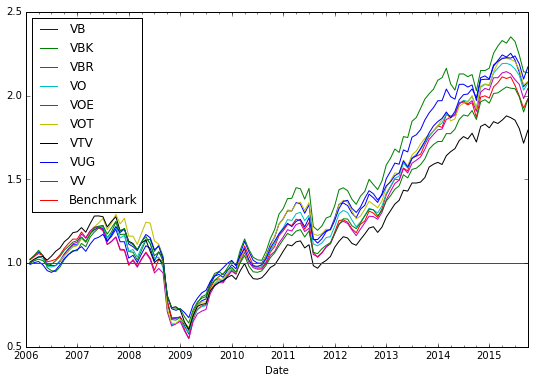

In [17]:
# Calculating Cumulative Returns / Benchmark
styles = styles.resample("M")
style_returns = styles.pct_change()
style_index = (1 + style_returns).cumprod()
style_index["Benchmark"]=1
style_index.plot()

In [18]:
# Returns for each styles
print "Value", "Blend", "Growth"
print "Large", style_index.VTV[-1], style_index.VV[-1], style_index.VUG[-1]
print "Mid", style_index.VOE[-1], style_index.VO[-1], style_index.VOT[-1]
print "Small", style_index.VBR[-1], style_index.VB[-1], style_index.VBK[-1]

Value Blend Growth
Large 1.79397531093 1.97867383795 2.17220029082
Mid 2.04373207113 2.07538416804 2.08474420153
Small 1.98204855189 2.08311895798 2.13688672585


### Returns and valuations by sector

In [19]:
# Data from SPDR ETFs Performance
# - Financial (XLF)
# - Health Care (XLV)
# - Technology (XLK)
# - Energy (XLE)
# - Consumer Discretionary (XLY)
# - Consumer Stable (XLP)
# - Industrials (XLI)
# - Utilities (XLU)

In [20]:
sectors = pd.io.data.get_data_yahoo(['XLF', 'XLV', 'XLK', 'XLE', 'XLY', 'XLP', 'XLI', 'XLU', 'SPY'], 
                               start=datetime.datetime(2005, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

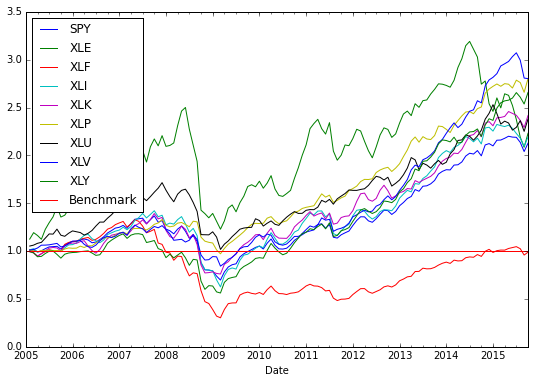

In [21]:
# Calculating Cumulative Returns / Benchmark
sectors = sectors.resample("M")
sectors_returns = sectors.pct_change()
sectors_index = (1 + sectors_returns).cumprod()
sectors_index["Benchmark"]=1
sectors_index.plot()

In [22]:
# Calculating Beta

"""
# create a time-series of monthly data points
rts = df.resample('M',how='last') # Individual df
rbts = dfb.resample('M',how='last') # Market dfb
"""

dfsm = pd.DataFrame({'Stock' : sectors.XLP,
                     'Market' : sectors.SPY},
                    index=sectors.index)

dfsmc = dfsm.pct_change()
dfsmc = dfsmc.dropna()

covmat = np.cov(dfsmc["Stock"],dfsmc["Market"])

beta = covmat[0,1]/covmat[1,1]
alpha= np.mean(dfsm["Stock"])-beta*np.mean(dfsm["Market"])

print beta

0.551072815882


In [23]:
# Sectors Correlation Table
sectors_corr = sectors.corr()
sectors_corr

SPY       XLE       XLF       XLI       XLK       XLP       XLU  \
SPY  1.000000  0.834205  0.340323  0.994119  0.983453  0.950760  0.963425   
XLE  0.834205  1.000000  0.061078  0.869134  0.838562  0.836229  0.874626   
XLF  0.340323  0.061078  1.000000  0.299807  0.192927  0.046258  0.203909   
XLI  0.994119  0.869134  0.299807  1.000000  0.980306  0.951989  0.962088   
XLK  0.983453  0.838562  0.192927  0.980306  1.000000  0.978328  0.966047   
XLP  0.950760  0.836229  0.046258  0.951989  0.978328  1.000000  0.956689   
XLU  0.963425  0.874626  0.203909  0.962088  0.966047  0.956689  1.000000   
XLV  0.975688  0.760135  0.230818  0.963628  0.975596  0.967133  0.941515   
XLY  0.982247  0.790255  0.239696  0.974368  0.983055  0.971738  0.936940   

          XLV       XLY  
SPY  0.975688  0.982247  
XLE  0.760135  0.790255  
XLF  0.230818  0.239696  
XLI  0.963628  0.974368  
XLK  0.975596  0.983055  
XLP  0.967133  0.971738  
XLU  0.941515  0.936940  
XLV  1.000000  0.981837  
XLY  0.981837  1.000000

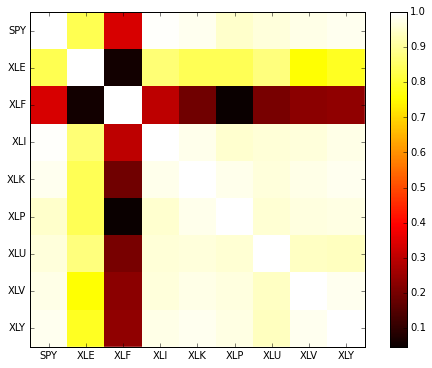

In [24]:
# Sectors Correlations Chart

plt.imshow(sectors_corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(sectors_corr)), sectors_corr.columns)
plt.yticks(range(len(sectors_corr)), sectors_corr.columns);

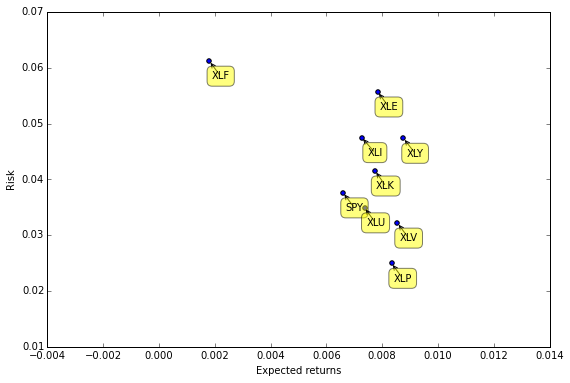

In [25]:
# Risk/Return Table

plt.scatter(sectors_returns.mean(), sectors_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(sectors_returns.columns, sectors_returns.mean(), sectors_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [26]:
# Others Information
# Retrieved using Yahoo_Finance Library https://pypi.python.org/pypi/yahoo-finance/1.2.1
sector = Share("XLF")
print sector.get_dividend_yield(), sector.get_price_earnings_ratio(), sector.get_price_book()

1.90 None None


### Market Volatility

In [27]:
# VIX Index
VIX = pd.io.data.get_data_yahoo("^VIX", 
                               start=datetime.datetime(2008, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

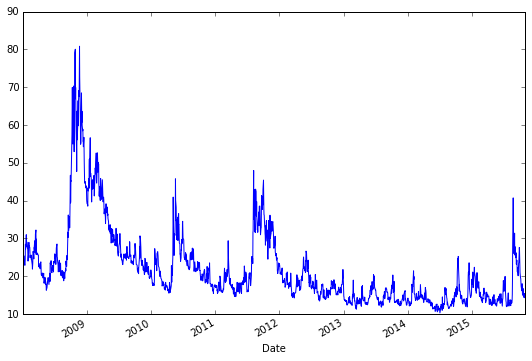

In [28]:
# Vix Chart
VIX.plot()

In [29]:
# Pullbacks
PULLBACKFILTER = 0.05
SP500_change = SP500.pct_change()
SP500_change[SP500_change>PULLBACKFILTER]

Date
1970-05-27    0.050224
1987-10-20    0.053327
1987-10-21    0.090994
1997-10-28    0.051152
1998-09-08    0.050899
2001-01-03    0.050099
2002-07-24    0.057327
2002-07-29    0.054078
2008-09-30    0.054175
2008-10-13    0.115800
2008-10-28    0.107890
2008-11-13    0.069213
2008-11-21    0.063248
2008-11-24    0.064723
2008-12-16    0.051360
2009-03-10    0.063663
2009-03-23    0.070758
Name: Adj Close, dtype: float64

### Annual returns

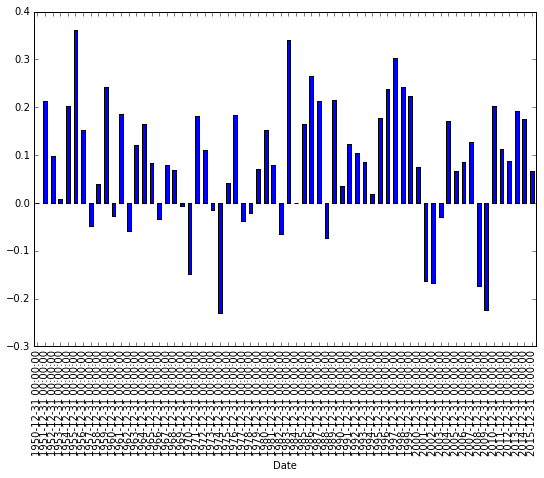

In [30]:
# SP500 Annual Returns
SP500AR = SP500.resample("A").pct_change()
SP500AR.plot(kind="bar")

### Interest rates and equities

In [31]:
# 10 Years Treasury Yields
T10 = pd.io.data.get_data_yahoo("^TNX", 
                               start=datetime.datetime(1900, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

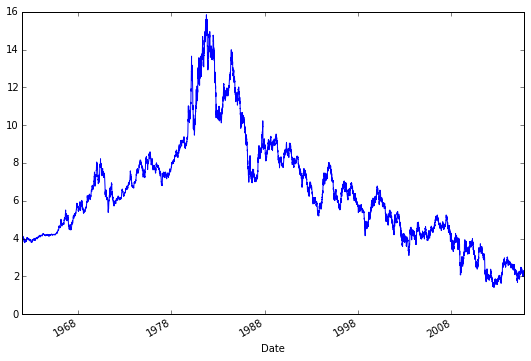

In [32]:
# 10 Years Treasury Yields Chart
T10.plot()

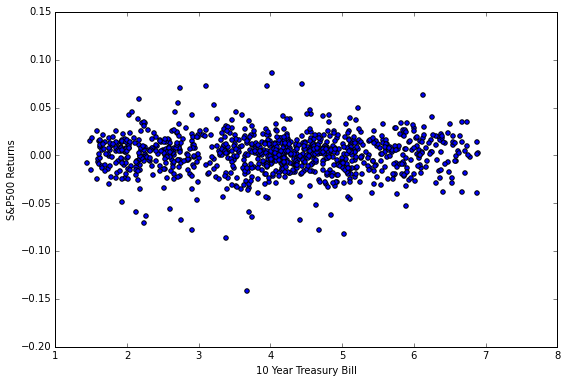

In [33]:
# Relationship between Interest Rates and Equities
T10R = T10.resample("W")["19970101":]
SP500R = SP500.resample("W")["19970101":].pct_change()

plt.scatter(T10R, SP500R)
plt.xlabel("10 Year Treasury Bill")
plt.ylabel("S&P500 Returns")


In [34]:
# Covariance Coefficient
# Rolling two year?

## Economy

### Economic growth

In [35]:
# GDP Growth Rate
USGDP = Quandl.get("FRED/GDP", trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")

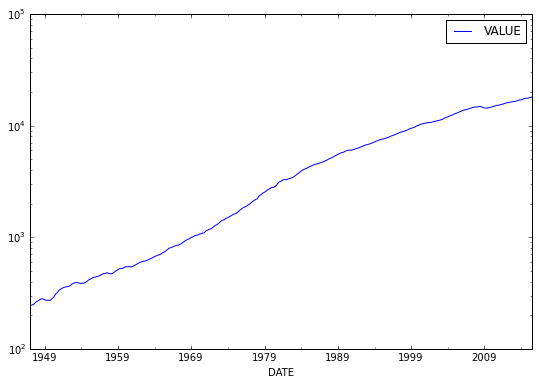

In [36]:
# GDP at Log Scale
USGDP.plot(logy=True)

VALUE    0.065285
dtype: float64


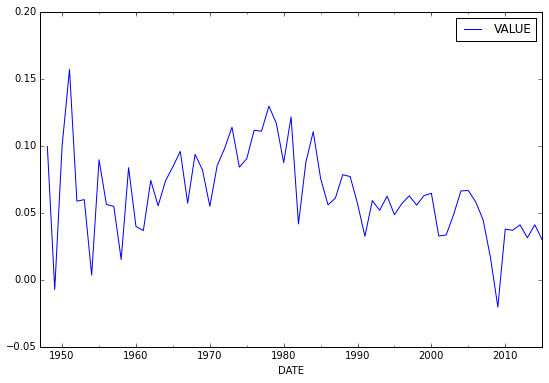

In [37]:
# GDP YoY Change
USGDPYOY = USGDP.resample("A").pct_change()
USGDPYOY.plot()
print USGDPYOY.mean()

In [38]:
# Global GDP Growth Comparison
# List of country code: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3
GlobalGDP = pd.io.wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['USA', 'CHN', 'GBR', 'DEU', 'JPN'], start=2000, end=2015)

In [39]:
GlobalGDP.unstack().T

country                     China   Germany     Japan  United Kingdom  \
                  year                                                  
NY.GDP.MKTP.KD.ZG 2000   8.429282  2.984908  2.257495        3.768865   
                  2001   8.298374  1.695286  0.355462        2.664535   
                  2002   9.090909  0.010756  0.289548        2.452282   
                  2003  10.019973 -0.720508  1.685112        4.300444   
                  2004  10.075643  1.180676  2.360730        2.453889   
                  2005  11.352391  0.706561  1.302728        2.806548   
                  2006  12.688225  3.710003  1.692904        3.042098   
                  2007  14.194962  3.269783  2.192186        2.555635   
                  2008   9.623377  1.052109 -1.041636       -0.332044   
                  2009   9.233551 -5.637954 -5.526976       -4.310616   
                  2010  10.631708  4.090770  4.652030        1.911378   
                  2011   9.484506  3.589997 -0.452725        1.645121   
                  2012   7.750298  0.376484  1.753690        0.659035   
                  2013   7.683810  0.105792  1.613367        1.664699   
                  2014   7.351000  1.604381 -0.104479        2.553033   
                  2015        NaN       NaN       NaN             NaN   

country                 United States  
                  year                 
NY.GDP.MKTP.KD.ZG 2000       4.092176  
                  2001       0.975982  
                  2002       1.786127  
                  2003       2.806775  
                  2004       3.785743  
                  2005       3.345216  
                  2006       2.666626  
                  2007       1.778570  
                  2008      -0.291622  
                  2009      -2.775529  
                  2010       2.531920  
                  2011       1.601454  
                  2012       2.321085  
                  2013       2.219308  
                  2014       2.388227  
                  2015            NaN

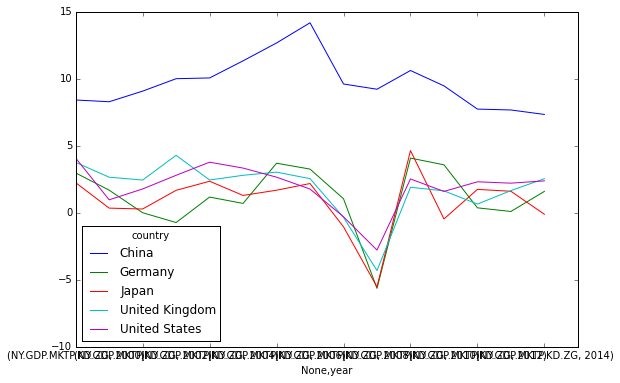

In [40]:
GlobalGDP.unstack().T.plot()

In [41]:
# Inflation
Inflation = Quandl.get("FRED/DDOE02USA086NWDB", trim_start="1950-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")

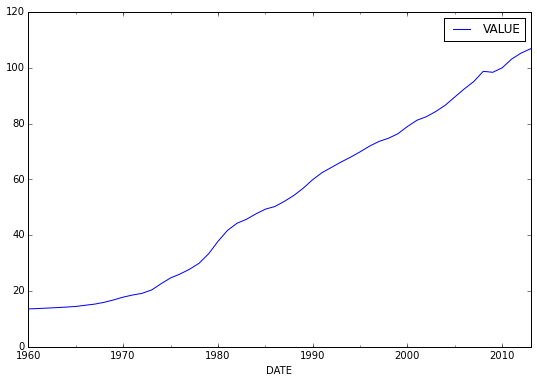

In [42]:
Inflation.plot()

### Consumer Finance

In [43]:
# Household Debt to GDP
HouseholdDebt = Quandl.get(["FRED/HDTGPDUSQ163N", "FRED/HDTGPDDEA163N", "FRED/HDTGPDFRA163N"], trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")

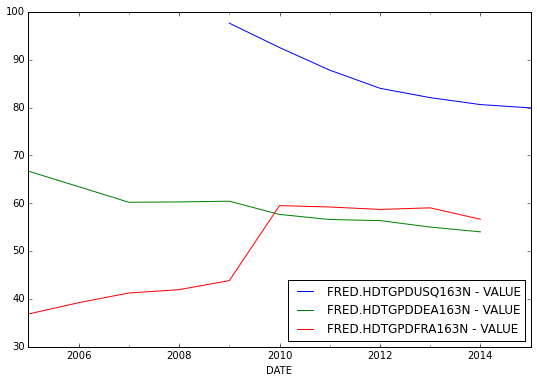

In [44]:
HouseholdDebt.resample("A").plot()

## Fixed Income

### Interest rate and inflation

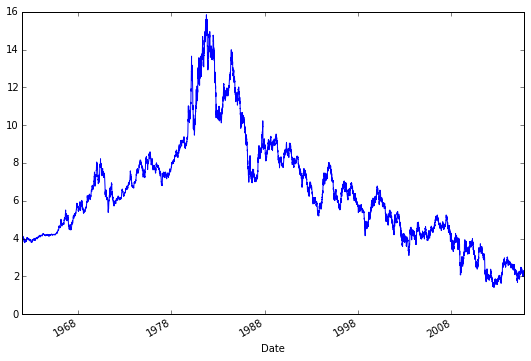

In [45]:
# 10 Year Treasury Yield
T10 = pd.io.data.get_data_yahoo("^TNX", 
                               start=datetime.datetime(1900, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']
T10.plot()

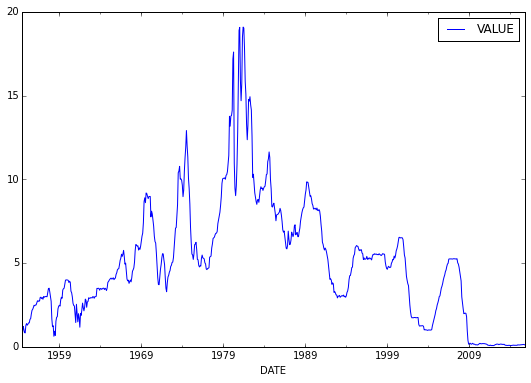

In [46]:
# Federal Fund Rate
# Household Debt to GDP
FundRate = Quandl.get("FRED/FEDFUNDS", trim_start="1900-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")
FundRate.plot()

### Yield Curve

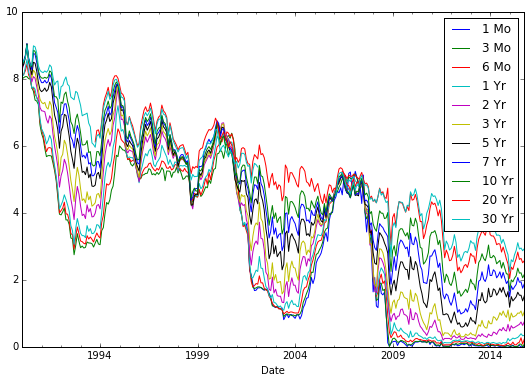

In [47]:
# Yield Curve
YieldCurve = Quandl.get("USTREASURY/YIELD", collapse="monthly", trim_start="1950-01-01", trim_end="2015-11-01", authtoken=QUANDLKEY, returns="pandas")
YieldCurve.plot()

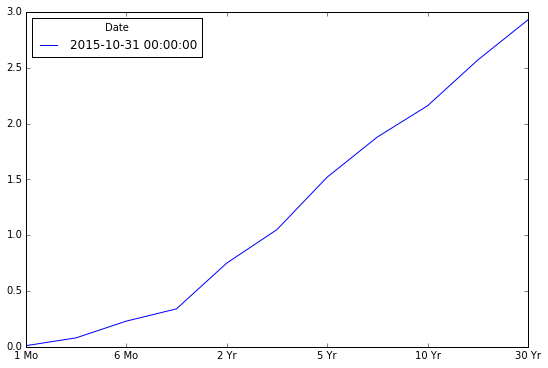

In [48]:
# Newest Yield Curve
YieldCurve[-1:].T.plot()

## Asset Class

### General Asset Classes

General Asset Class:
- Equity: iShares MSCI ACWI (ACWI)
- Fixed Income: SPDR Barclays Aggregate Bond ETF (LAG)
- Commodity: iPath Bloomberg Commodity Index (DJP)
- Real Estate: First Trust S&P REIT Index Fund (FRI)

In [49]:
assets = pd.io.data.get_data_yahoo(["ACWI", "LAG", "DJP", "FRI"], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2015, 11, 1))['Adj Close']

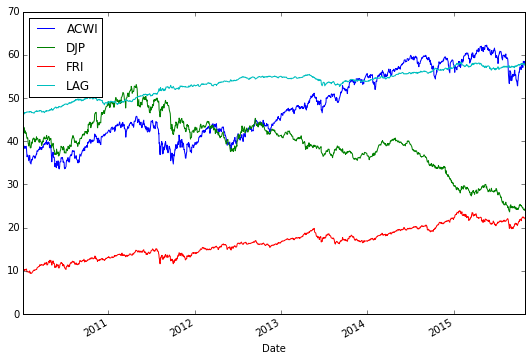

In [50]:
assets.plot()

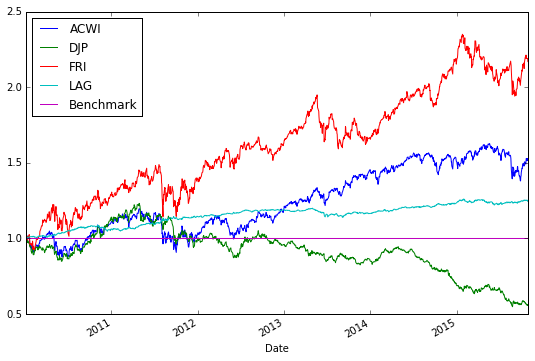

In [51]:
# Calculating Cumulative Returns / Benchmark
assets_returns = assets.pct_change()
assets_index = (1 + assets_returns).cumprod()
assets_index["Benchmark"]=1
assets_index.plot()

In [52]:
# Sectors Correlation Table
assets_corr = assets.corr()
assets_corr

ACWI       DJP       FRI       LAG
ACWI  1.000000 -0.681458  0.932580  0.807331
DJP  -0.681458  1.000000 -0.722791 -0.657288
FRI   0.932580 -0.722791  1.000000  0.932245
LAG   0.807331 -0.657288  0.932245  1.000000

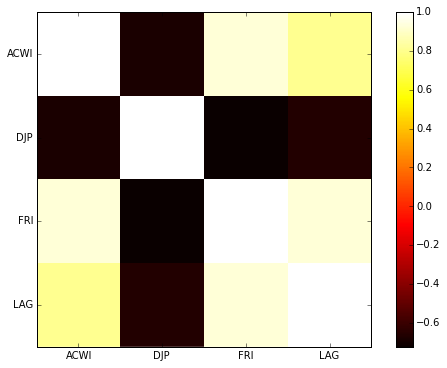

In [53]:
# Sectors Correlations Chart

plt.imshow(assets_corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(assets_corr)), assets_corr.columns)
plt.yticks(range(len(assets_corr)), assets_corr.columns);

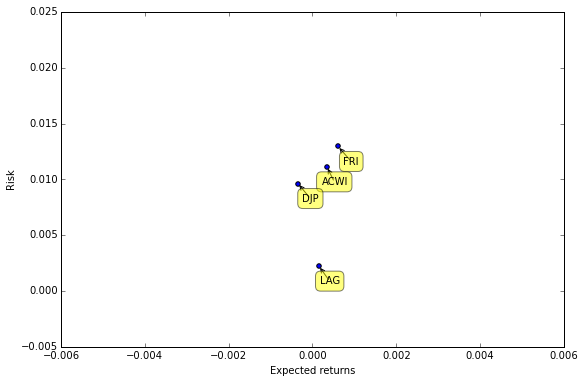

In [55]:
# Risk/Return Table

plt.scatter(assets_returns.mean(), assets_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(assets_returns.columns, assets_returns.mean(), assets_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))